<a href="https://colab.research.google.com/github/tuanymariiah/DSB/blob/main/DSB_Processo_Seletivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processo Seletivo DSB
---
Autora: Tuany Mariah Lima do Nascimento


# Importacao das Bibliotecas
---



In [1]:
import warnings
import re
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn
import string
from matplotlib import pyplot as plt
from matplotlib import gridspec

#----

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# Carrega Dataset

---



In [2]:
licitacao2016 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2016/licitacao2016.csv'
licitacao2017 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2017/licitacao2017.csv'
licitacao2018 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2018/licitacao2018.csv'
licitacao2019 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2019/licitacao2019.csv'

df_licitacao2016 = pd.read_csv(licitacao2016)
df_licitacao2017 = pd.read_csv(licitacao2017)
df_licitacao2018 = pd.read_csv(licitacao2018)
df_licitacao2019 = pd.read_csv(licitacao2019)

licitacao_list = [df_licitacao2016, df_licitacao2017, df_licitacao2018, df_licitacao2019]
licitacao = pd.concat(licitacao_list)

#----------
item2016 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2016/item2016.csv'
item2017 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2017/item2017.csv'
item2018 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2018/item.csv'
item2019 = '/content/drive/MyDrive/Projetos Pessoais/processos seletivos/DSB/datasets/2019/item2019.csv'

df_item2016 = pd.read_csv(item2016,encoding='utf-8', header=0, sep=',', decimal=",")
df_item2017 = pd.read_csv(item2017,encoding='utf-8', header=0, sep=',', decimal=",",)
df_item2018 = pd.read_csv(item2018,encoding='utf-8', header=0, sep=',', decimal=",")
df_item2019 = pd.read_csv(item2019,encoding='utf-8', header=0, sep=',', decimal=",")
item_list = [df_item2016, df_item2017, df_item2018, df_item2019]
item = pd.concat(item_list)

In [3]:
licitacao_compras = licitacao[licitacao['TP_OBJETO']=='COM']
df = licitacao_compras.merge(item[['CD_ORGAO','NR_LICITACAO', 'QT_ITENS','ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'VL_UNITARIO_HOMOLOGADO','VL_TOTAL_HOMOLOGADO', 'VL_UNITARIO_ESTIMADO','VL_TOTAL_ESTIMADO','DS_ITEM']], how='inner', left_on=['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'], right_on=['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])


In [4]:
df = df[~df['DS_OBJETO'].str.contains("serviço|servidores|contrato|contratação|anexo|locação|tabela|storage all|constituído deconforme|aquisição|edital",na=False, case=True)].reset_index(drop =True)
df = df[~df['DS_ITEM'].str.contains("serviço|servidores|contrato|contratação|anexo|anexos|locação|conforme anexo|tabela|storage all|constituído deconforme|aquisição|edital",na=False, case=True)].reset_index(drop =True)



In [5]:
df = licitacao_compras.merge(item[['CD_ORGAO','NR_LICITACAO', 'QT_ITENS','ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'VL_UNITARIO_HOMOLOGADO','VL_TOTAL_HOMOLOGADO', 'VL_UNITARIO_ESTIMADO','VL_TOTAL_ESTIMADO','DS_ITEM']], how='inner', left_on=['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'], right_on=['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])
df['DS_ITEM'] = df['DS_ITEM'].apply( lambda x: re.sub( '[0-9]|\,|\.|\%|\/|\-|[^a-zA-Z0-9 \\\]','', x ).lower())
df['DS_OBJETO'] = df['DS_OBJETO'].apply( lambda x: re.sub( '[0-9]|\,|\.|\%|\/|\-|[^a-zA-Z0-9 \\\]','', x ).lower())

In [6]:
dsitem = df['DS_ITEM']
def Preprocessing(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

dsitem = [Preprocessing(i) for i in dsitem]
df['DS_ITEM'] = dsitem


In [7]:
#dsitem=df['DS_ITEM]
def teste(registro):
  try:
      registro = re.search("(\w+)", registro).group(0)
  except AttributeError:
      registro = re.search("(\w+) (\w+) (\w+)", registro)
  return registro

df['DS_ITEM']  =  df['DS_ITEM'].apply(lambda x : teste ( x ))


In [8]:
#verificando os valores nulos
df[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO', 'ANO_LICITACAO', 'NM_ORGAO', 'VL_UNITARIO_ESTIMADO', 'DT_ABERTURA',
    'DT_HOMOLOGACAO', 'DT_ADJUDICACAO', 'QT_ITENS']].isna().sum()

DS_ITEM                     1090
VL_UNITARIO_HOMOLOGADO    152631
ANO_LICITACAO                  0
NM_ORGAO                       0
VL_UNITARIO_ESTIMADO       22485
DT_ABERTURA                    0
DT_HOMOLOGACAO            113692
DT_ADJUDICACAO            119466
QT_ITENS                       0
dtype: int64

In [9]:
df.dropna(how='any',axis=0, subset= ['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO', 'ANO_LICITACAO', 'NM_ORGAO', 'VL_UNITARIO_ESTIMADO', 'DT_ABERTURA','DT_HOMOLOGACAO', 'DT_ADJUDICACAO'], inplace = True)

In [10]:
#descrricao de cada coluna do dataset
#df.describe()
df['VL_UNITARIO_ESTIMADO'] = df['VL_UNITARIO_ESTIMADO'].astype(float)
df['VL_UNITARIO_HOMOLOGADO'] = df['VL_UNITARIO_HOMOLOGADO'].astype(float)
#como podemos ver, temos os valores minimos como -1 e 0 nas respectivas colunas VL_UNITARIO_HOMOLOGADO e VL_UNITARIO_ESTIMADO, por tanto as linhas que possuir esse valor serao substituidas com a média
df[['VL_UNITARIO_HOMOLOGADO','VL_UNITARIO_ESTIMADO']].describe()

,VL_UNITARIO_HOMOLOGADO,VL_UNITARIO_ESTIMADO
count,1.161705e+06,1.161705e+06
mean,7.347662e+02,7.827578e+02
std,3.229303e+04,3.799759e+04
min,-1.932000e+04,0.000000e+00
25%,2.200000e+00,1.720000e+00
50%,6.900000e+00,6.930000e+00
75%,3.420000e+01,3.790000e+01
max,2.901000e+07,3.249369e+07


In [11]:
#retira os valores menores que 0 nos valores de VL_UNITARIO_HOMOLOGADO e VL_UNITARIO_ESTIMADO
df = df[(df['VL_UNITARIO_HOMOLOGADO']>0) & df['VL_UNITARIO_ESTIMADO']>0]
#cria uma nova coluna com labels para os bens materiais 

def valorBem(registro):
  if registro['VL_UNITARIO_HOMOLOGADO'] < 8.461925e+02:
    return 'baixo'
  elif registro['VL_UNITARIO_HOMOLOGADO'] == 8.461925e+02:
    return 'medio'
  elif registro['VL_UNITARIO_HOMOLOGADO'] > 8.461925e+02:
    return 'alto'
df['VALOR_BEM'] = df.apply(valorBem, axis=1)
#df[df['VALOR_BEM'] == 'baixo valor']

In [12]:
df[['VL_UNITARIO_HOMOLOGADO','VL_UNITARIO_ESTIMADO']].describe()

,VL_UNITARIO_HOMOLOGADO,VL_UNITARIO_ESTIMADO
count,1.041665e+06,1.041665e+06
mean,7.651628e+02,8.715098e+02
std,3.396867e+04,4.012476e+04
min,1.000000e-04,1.000000e-04
25%,2.280000e+00,3.000000e+00
50%,7.000000e+00,9.330000e+00
75%,3.600000e+01,4.797000e+01
max,2.901000e+07,3.249369e+07


# Perguntas a serem respondidas
---

1. Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?

2. É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador

4. O que mais é possível descobrir sobre as licitações do estado?

In [13]:
#verificando os valores nulos
df[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO', 'ANO_LICITACAO', 'NM_ORGAO', 'VL_UNITARIO_ESTIMADO', 'DT_ABERTURA',
    'DT_HOMOLOGACAO', 'DT_ADJUDICACAO', 'QT_ITENS']].isna().sum()

DS_ITEM                   0
VL_UNITARIO_HOMOLOGADO    0
ANO_LICITACAO             0
NM_ORGAO                  0
VL_UNITARIO_ESTIMADO      0
DT_ABERTURA               0
DT_HOMOLOGACAO            0
DT_ADJUDICACAO            0
QT_ITENS                  0
dtype: int64

In [14]:
def situacao_homologado(registro):
    if registro['VL_UNITARIO_HOMOLOGADO'] > registro['VL_UNITARIO_ESTIMADO']:#ACIMA DO VALOR ESTIMADO?
        return 'acima'
    elif registro['VL_UNITARIO_HOMOLOGADO'] < registro['VL_UNITARIO_ESTIMADO']:#ABAIXO DO VALOR ESTIMADO?
        return 'abaixo'
    else:
      return 'igual'#IGUAL AO VALOR ESTIMADO

df['SITUACAO'] = df.apply(situacao_homologado, axis=1)


# Quais itens foram comprados acima do valor estimado?

In [15]:
df[['DS_ITEM', 'QT_ITENS', 'VL_UNITARIO_HOMOLOGADO', 'VL_UNITARIO_ESTIMADO','SITUACAO']][df['VL_UNITARIO_HOMOLOGADO']>df['VL_UNITARIO_ESTIMADO']].head(4)

,DS_ITEM,QT_ITENS,VL_UNITARIO_HOMOLOGADO,VL_UNITARIO_ESTIMADO,SITUACAO
99,toalha,10.00,6.6,6.0,acima
101,toalha,10.00,6.6,6.0,acima
107,toalha,10.00,6.6,6.0,acima
144,toalha,25.00,6.6,5.2,acima


#Quais itens foram comprados abaixo do valor estimado?

In [16]:
df[['DS_ITEM', 'QT_ITENS','VL_UNITARIO_HOMOLOGADO', 'VL_UNITARIO_ESTIMADO', 'SITUACAO']][df['VL_UNITARIO_HOMOLOGADO']<df['VL_UNITARIO_ESTIMADO']].head(4)

,DS_ITEM,QT_ITENS,VL_UNITARIO_HOMOLOGADO,VL_UNITARIO_ESTIMADO,SITUACAO
0,biscoito,72.00,5.00,6.5,abaixo
1,biscoito,72.00,3.61,4.0,abaixo
2,farinha,4.00,8.58,9.0,abaixo
3,acar,4.00,12.35,16.5,abaixo


#Quantos itens foram comprados acima, abaixo ou igual ao valor estimado?

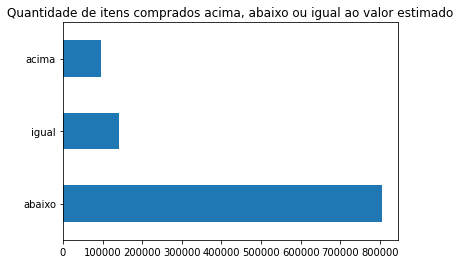

In [17]:
df['SITUACAO'].value_counts().plot(kind='barh', title='Quantidade de itens comprados acima, abaixo ou igual ao valor estimado');

#Quantos itens foram comprados com valor baixo e alto

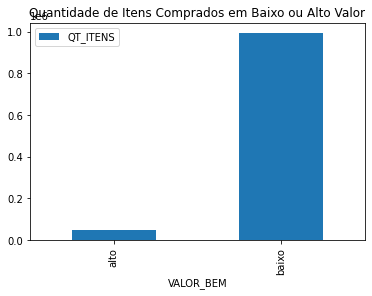

In [18]:
df[['QT_ITENS', 'VALOR_BEM']].groupby('VALOR_BEM').count().plot(kind='bar', title='Quantidade de Itens Comprados em Baixo ou Alto Valor');

#Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?

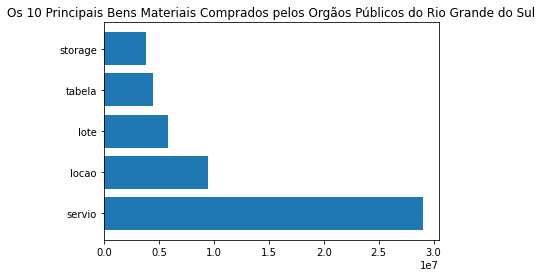

In [19]:
#procura os bens que possuem o valor alto:
#ordena pelo preco
#pega os 10primeiros
bens = df[df['VALOR_BEM']=='alto']
bens = bens[['DS_ITEM','ANO_LICITACAO','VL_UNITARIO_HOMOLOGADO', 'VALOR_BEM']].sort_values('VL_UNITARIO_HOMOLOGADO', ascending=False).head(10)
bens[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']].value_counts()

plt.barh( bens['DS_ITEM'], bens['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 Principais Bens Materiais Comprados pelos Orgãos Públicos do Rio Grande do Sul');

#É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador?


In [20]:
padrao_ano = df.groupby('ANO_LICITACAO')
padrao_ano['DS_ITEM'].value_counts()

ANO_LICITACAO  DS_ITEM    
2016           papel          3015
               pneu           2529
               luva           2180
               fita           1964
               filtro         1899
                              ... 
2019           zinna             1
               zinnia            1
               ziprasidona       1
               zoe               1
               zoolgico          1
Name: DS_ITEM, Length: 35966, dtype: int64

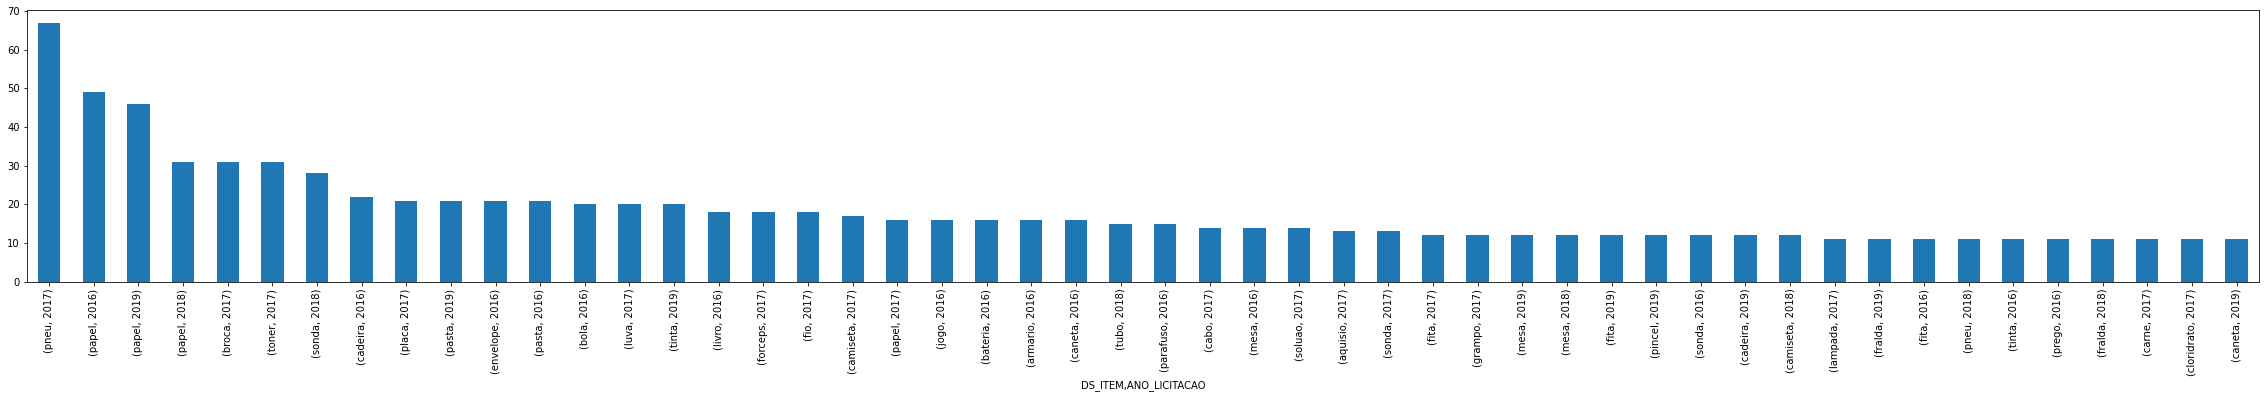

In [21]:
padrao_orgao = df[df['NM_ORGAO']=='PM DE SANTA MARIA']
padrao_orgao[['DS_ITEM', 'ANO_LICITACAO']].value_counts().head(50).plot(kind='bar', figsize=(40,5))

# Em qual ano houve mais licitação?

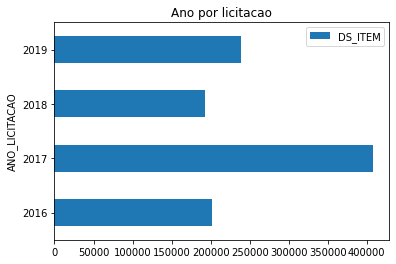

In [22]:
df[['ANO_LICITACAO', 'DS_ITEM']].groupby('ANO_LICITACAO').count().plot(kind='barh', title='Ano por licitacao');#.reset_index()


# Orgao que mais fez pedido no ano de 2016

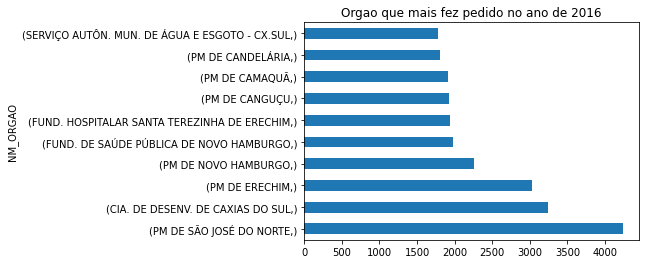

In [23]:
df[['NM_ORGAO']][df['ANO_LICITACAO']==2016].value_counts().head(10).plot(kind='barh', title='Orgao que mais fez pedido no ano de 2016');

#Orgao que mais fez pedido no ano de 2017

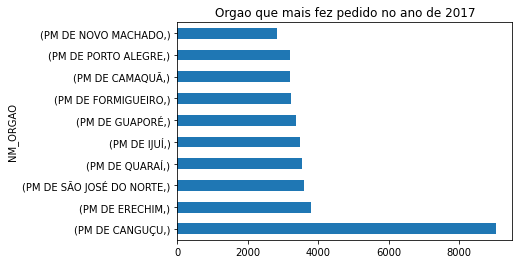

In [24]:
df[['NM_ORGAO']][df['ANO_LICITACAO']==2017].value_counts().head(10).plot(kind='barh', title='Orgao que mais fez pedido no ano de 2017');

#Orgao que mais fez pedido no ano de 2018

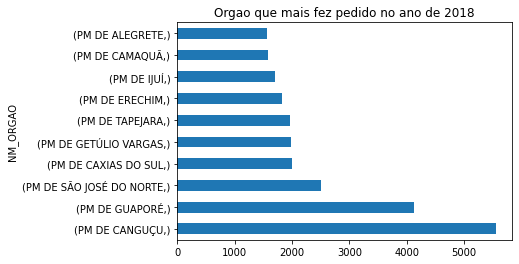

In [25]:
df[['NM_ORGAO']][df['ANO_LICITACAO']==2018].value_counts().head(10).plot(kind='barh', title='Orgao que mais fez pedido no ano de 2018');

#Orgao que mais fez pedido no ano de 2019

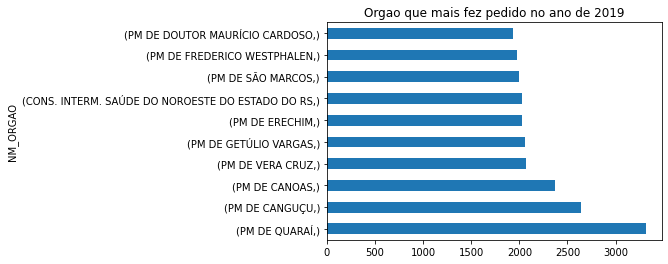

In [26]:
df[['NM_ORGAO']][df['ANO_LICITACAO']==2019].value_counts().head(10).plot(kind='barh', title='Orgao que mais fez pedido no ano de 2019');

#Quais os 10 primeiros orgaos que fizeram compras de materiais acima do valor estimado no período de 2016 a 2019

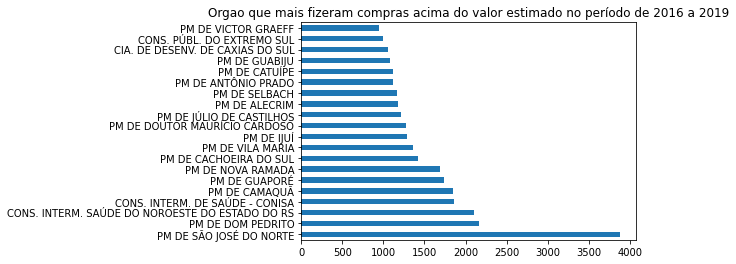

In [27]:
orgao_acima = df[df['SITUACAO']=='acima'].sort_values('VL_UNITARIO_HOMOLOGADO', ascending=False)#.value_counts().head(10)
orgao_acima['NM_ORGAO'].value_counts().head(20).plot(kind='barh', title='Orgao que mais fizeram compras acima do valor estimado no período de 2016 a 2019');